Importing libraries

In [11]:
import numpy as np
import pandas as pd
import sklearn
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from matplotlib.ticker import FuncFormatter

Importing Dataset

In [12]:
from google.colab import drive

In [13]:
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
train=pd.read_csv('/content/drive/MyDrive/ML Final/train.csv')

In [15]:
test=pd.read_csv('/content/drive/MyDrive/ML Final/test.csv')

In [16]:
train.head(5)

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [17]:
train.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [18]:
#assigning the corresponding english names
train.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
test.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

In [19]:
train.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [20]:
#check info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

In [21]:
#checking unique values
print(train.nunique())

Id                         800
status                       4
duration                    31
credit_history               5
purpose                     10
amount                     754
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         52
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64


In [22]:
#Check for null values
train.isnull().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Outliers in column 'duration': [ 8 11 11 11 11 42 33  4 47 27 14 39  4 39  5 11 54 11 27 60 42 42 28 11
 11 39  7 27 27 20 14 60 20 27  4  4  4  7  4 11 33 14 20  8 42 20 42  7
  8  8  7  8 20 60 60 45 42 60 42 60 20 28 60 33 42 72 60 39 60 27 60 42
 60 27 20 54 14]


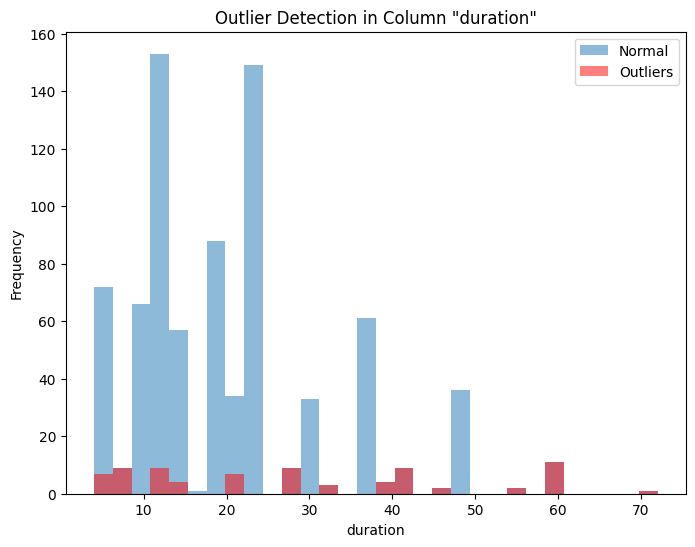

Outliers in column 'amount': [ 7582   385 10875   428   409  8858   392 12749  8072  8487  7721 12169
 10722  8613  8588  7678  8133   339  9436   250  7758   343 13756   276
   458   522 11760  7814  9566  8358  9857   362 10222  9055 12204 10623
  9277  7882 15857   368   484 10144   454 15653  8471  8947 11054  9157
  9283  7596 10974  7865  8229  7685 14555  8386   433 15672 10961 11938
 14782 12612  9398   433  7763  9034 14027  9629 12976 14421 10127 12389
 15945  8648   448 11998 18424  8978 12579 12680]


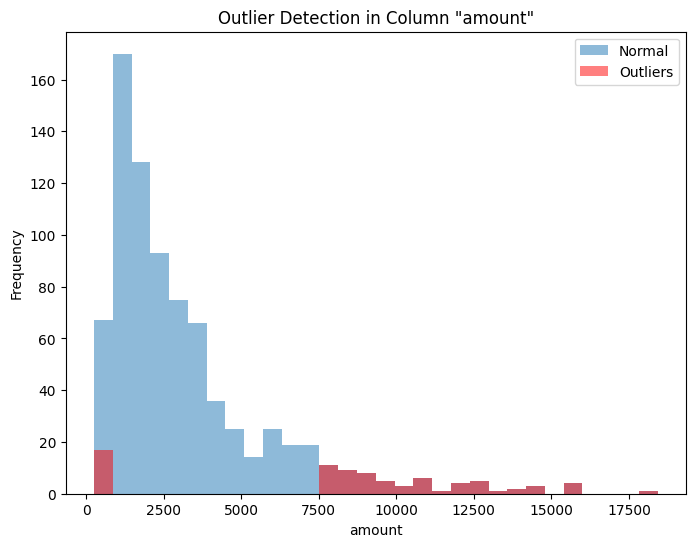

Outliers in column 'age': [21 65 56 58 61 58 63 60 58 60 63 59 61 64 74 74 64 74 20 20 19 65 63 63
 59 61 57 63 66 64 57 68 57 21 66 70 60 57 67 56 20 20 20 21 66 75 63 64
 20 21 21 57 67 20 65 21 61 63 21 66 58 60 61 61 63 19 60 21 57 20 57 61
 58 20 20]


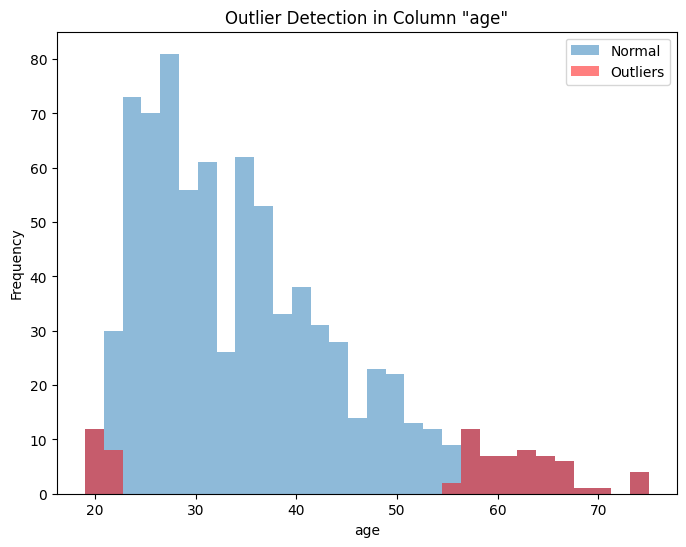

Number of outliers in each numerical column:
Column 'duration': 77 outliers
Column 'amount': 80 outliers
Column 'age': 75 outliers


In [15]:
#detecting outliers
numerical_columns=['duration','amount','age']

# Dictionary to store the number of outliers in each numerical column
outliers_count = {}

# Perform outlier detection for each numerical column
for col in numerical_columns:
    # Extract the column values as a numpy array
    column_values = train[col].values.reshape(-1, 1)

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=0.1, random_state=42)
    clf.fit(column_values)

    # Predict outliers
    outliers = clf.predict(column_values)

    # Identify and print the outliers
    outlier_indices = np.where(outliers == -1)[0]
    outlier_values = column_values[outlier_indices].flatten()
    print(f"Outliers in column '{col}': {outlier_values}")

    # Visualize the outliers
    plt.figure(figsize=(8, 6))
    plt.hist(column_values, bins=30, alpha=0.5, label='Normal')
    plt.hist(outlier_values, bins=30, alpha=0.5, color='red', label='Outliers')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Outlier Detection in Column "{col}"')
    plt.legend()
    plt.show()

    # Count the number of outliers
    num_outliers = np.sum(outliers == -1)
    outliers_count[col] = num_outliers

# Print the number of outliers in each numerical column
print("Number of outliers in each numerical column:")
for col, count in outliers_count.items():
    print(f"Column '{col}': {count} outliers")



In [23]:
#Recoding Age variable to categorical
interval=(18,25,35,60,100)
categories= ['Student','Young','Adult','Senior']
train['age']=pd.cut(train.age,interval,labels=categories)


In [55]:
train.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,credit_risk_label,foreign_worker_label
0,1,18,4,2,1049,1,2,4,2,1,...,3,1,1,3,2,1,2,1,Good,no
1,1,9,4,0,2799,1,3,2,3,1,...,3,1,2,3,1,1,2,1,Good,no
2,2,12,2,9,841,2,4,2,2,1,...,3,1,1,2,2,1,2,1,Good,no
3,1,12,4,0,2122,1,3,3,3,1,...,3,1,2,2,1,1,1,1,Good,yes
4,1,10,4,0,2241,1,2,1,3,1,...,3,1,2,2,1,1,1,1,Good,yes


In [24]:
# drop the Id column as it is not useful for the model
train.drop(['Id'],inplace=True,axis=1)

Recoding Amount,Duration and Age

<ipython-input-25-85ec98b0693b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_duration, bins=20, color='blue')  # Specify color as 'blue'


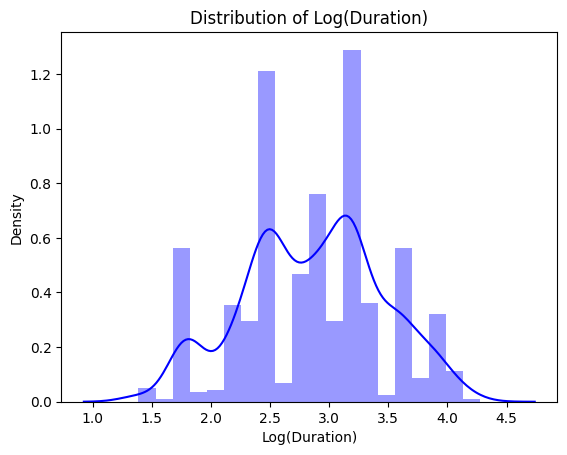

In [25]:
log_duration = np.log(train['duration'])
sns.distplot(log_duration, bins=20, color='blue')  # Specify color as 'blue'
plt.title('Distribution of Log(Duration)')
plt.xlabel('Log(Duration)')
plt.ylabel('Density')
plt.show()
train['duration']=log_duration

<ipython-input-26-10744a10897c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_amount, bins=20, color='blue')  # Specify color as 'blue'


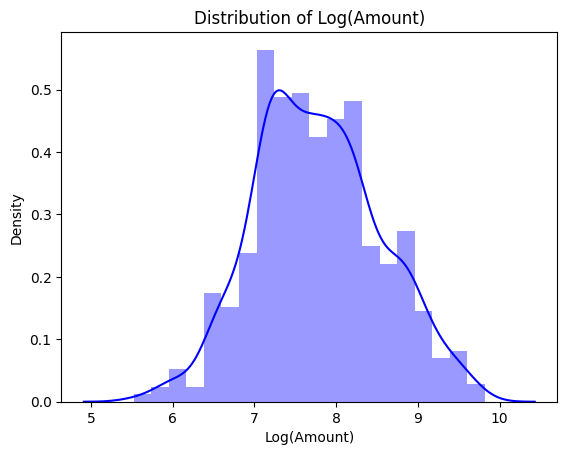

In [26]:
log_amount = np.log(train['amount'])
sns.distplot(log_amount, bins=20, color='blue')  # Specify color as 'blue'
plt.title('Distribution of Log(Amount)')
plt.xlabel('Log(Amount)')
plt.ylabel('Density')
plt.show()
train['amount']=log_amount

 **Descrptive Analysis**

<ipython-input-20-8dd0e33942ac>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage_data.index, y=percentage_data.values, palette=custom_palette)


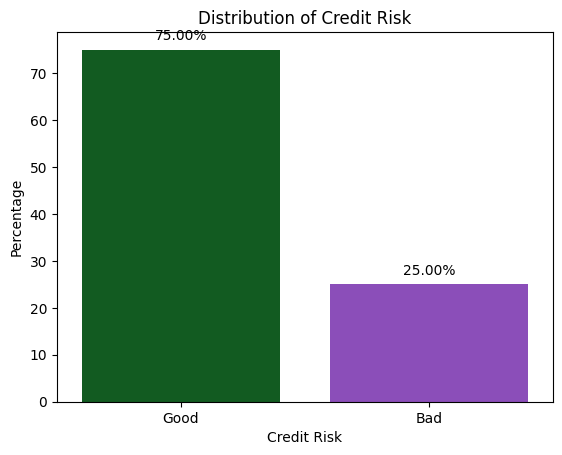

In [20]:
#defining a color palette
custom_palette = sns.color_palette(["#06671A", "#8E3CCB"])

train['credit_risk_label'] = train['credit_risk'].map({0: 'Bad', 1: 'Good'})

# Calculate percentage of each category
percentage_data = train['credit_risk_label'].value_counts(normalize=True) * 100

# Plotting the bar plot with custom palette
ax = sns.barplot(x=percentage_data.index, y=percentage_data.values, palette=custom_palette)
plt.xlabel('Credit Risk')
plt.ylabel('Percentage')
plt.title('Distribution of Credit Risk')
# Adding percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

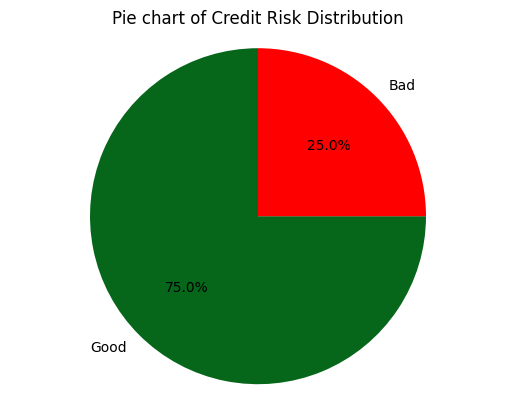

In [65]:
#pie chart for credit risk
category_counts=train['credit_risk_label'].value_counts()
colors=["#06671A","#FF0000"]
plt.pie(category_counts,labels=category_counts.index,colors=colors,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Pie chart of Credit Risk Distribution')
plt.show()

**Distribution of foreign worker**

<ipython-input-30-b1a88cdff66b>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  percentage_data = train.groupby(['foreign_worker_label', 'credit_risk']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()


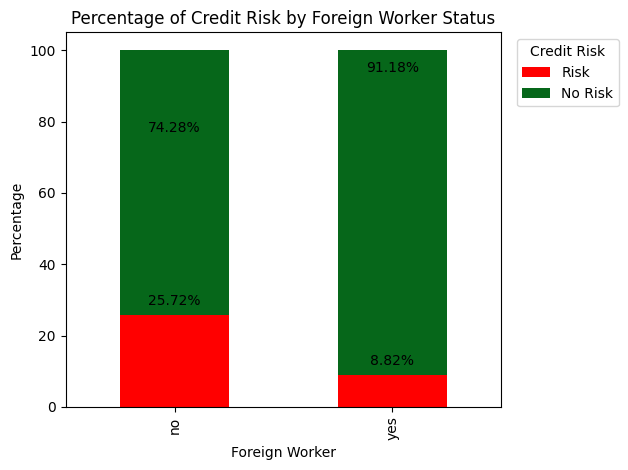

In [30]:
train['foreign_worker_label'] = train['foreign_worker'].map({1: 'yes', 2: 'no'})

# Calculate percentage of each category for each credit risk type
percentage_data = train.groupby(['foreign_worker_label', 'credit_risk']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plotting the bar plot with custom palette
ax = percentage_data.plot(kind='bar', stacked=True, color=["#FF0000","#06671A"])
plt.xlabel('Foreign Worker')
plt.ylabel('Percentage')
plt.title('Percentage of Credit Risk by Foreign Worker Status')

# Adding percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding legend to the top right
plt.legend(title='Credit Risk', labels=['Risk', 'No Risk'], bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

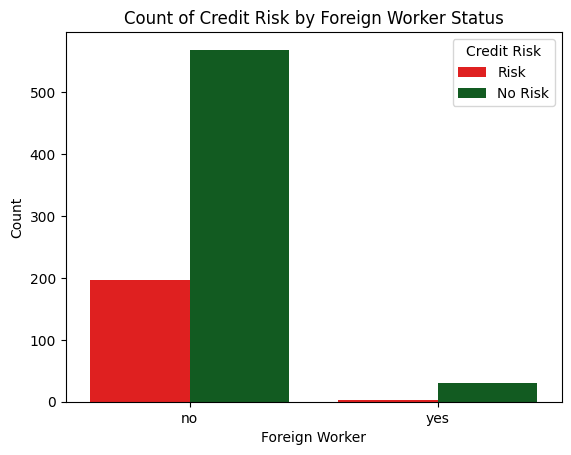

In [31]:
train['foreign_worker_label'] = train['foreign_worker'].map({1: 'yes', 2: 'no'})
custom_palette = sns.color_palette(["#FF0000","#06671A"])

# Creating the count plot
sns.countplot(x='foreign_worker_label', hue='credit_risk', data=train,palette=custom_palette)
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.title('Count of Credit Risk by Foreign Worker Status')
plt.legend(title='Credit Risk', labels=['Risk', 'No Risk'])
plt.show()

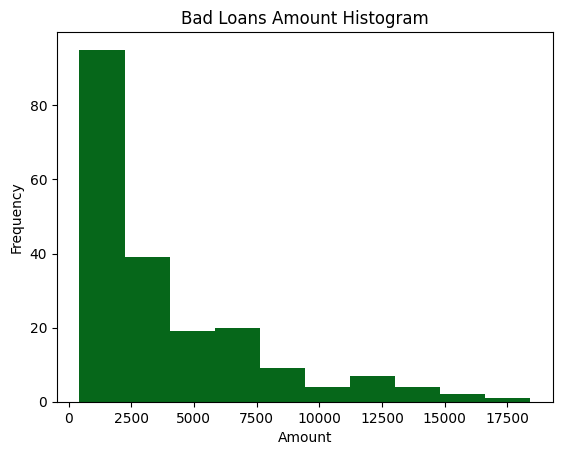

In [33]:
plt.hist(train[train['credit_risk'] == 0]['amount'], color='#06671A')  # Specify color as 'red'
plt.title('Bad Loans Amount Histogram')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


<ipython-input-74-0f0a1d000be2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age',y='amount',data=train,palette=custom_palette)
<ipython-input-74-0f0a1d000be2>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='age',y='amount',data=train,palette=custom_palette)


Text(0.5, 1.0, 'Box Plot of Amount by Age Group')

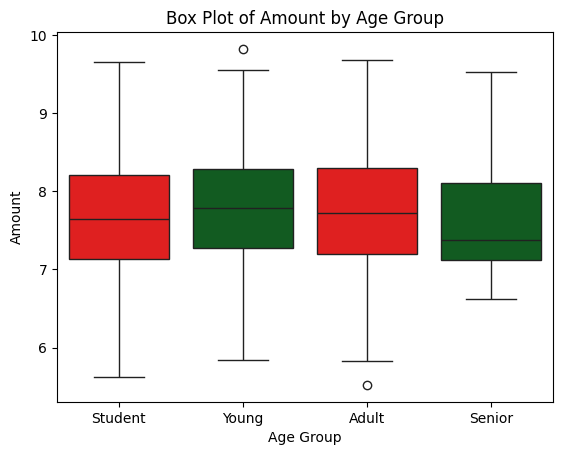

In [74]:
#box plot for age vs amount
custom_palette = sns.color_palette(["#FF0000","#06671A"])
sns.boxplot(x='age',y='amount',data=train,palette=custom_palette)
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Age Group')

<ipython-input-83-00730d460f3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='personal_status_sex',y='amount',data=train,palette=custom_palette)
<ipython-input-83-00730d460f3e>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='personal_status_sex',y='amount',data=train,palette=custom_palette)


([<matplotlib.axis.XTick at 0x7a93b2d3ec20>,
 [Text(0, 0, 'divorced male'),
  Text(1, 0, 'non-single female or single male'),
  Text(2, 0, 'married or widowed male'),
  Text(3, 0, 'single female')])

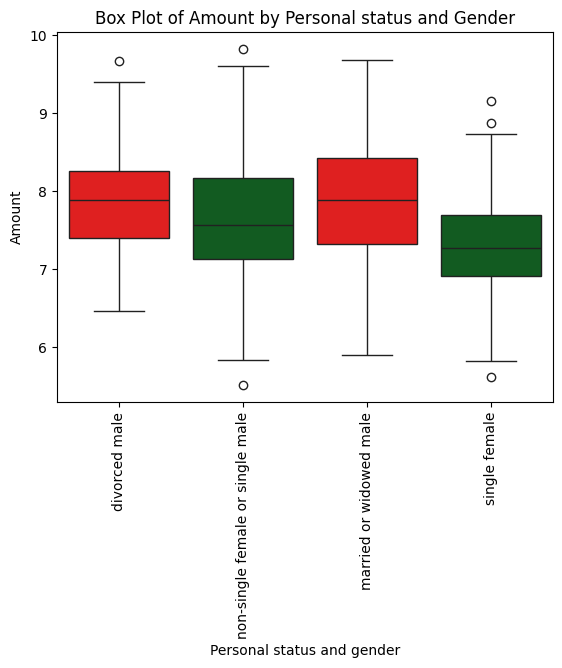

In [83]:
#box plot for personal status vs amount
custom_palette = sns.color_palette(["#FF0000","#06671A"])
sns.boxplot(x='personal_status_sex',y='amount',data=train,palette=custom_palette)
plt.xlabel('Personal status and gender')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Personal status and Gender')
custom_labels=['divorced male', 'non-single female or single male', 'married or widowed male', 'single female']
plt.xticks(ticks=[0,1,2,3],labels=custom_labels, rotation=90)

<ipython-input-85-599c484c1743>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job',y='amount',data=train,palette=custom_palette)
<ipython-input-85-599c484c1743>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='job',y='amount',data=train,palette=custom_palette)


([<matplotlib.axis.XTick at 0x7a93b09ce860>,
 [Text(0, 0, 'unemployed non resident'),
  Text(1, 0, 'unemployed resident'),
  Text(2, 0, 'skilled employee'),
  Text(3, 0, 'highly qualified employee')])

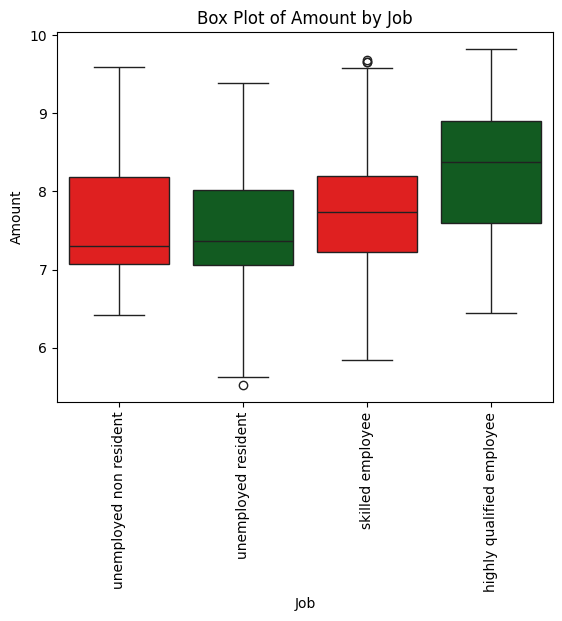

In [85]:
#box plot for job vs amount
custom_palette = sns.color_palette(["#FF0000","#06671A"])
sns.boxplot(x='job',y='amount',data=train,palette=custom_palette)
plt.xlabel('Job')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Job')
custom_labels=['unemployed non resident','unemployed resident','skilled employee','highly qualified employee']
plt.xticks(ticks=[0,1,2,3],labels=custom_labels, rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '0.00'),
  Text(1, 0, '1.00'),
  Text(2, 0, '2.00'),
  Text(3, 0, '3.00'),
  Text(4, 0, '4.00'),
  Text(5, 0, '5.00'),
  Text(6, 0, '6.00'),
  Text(7, 0, '7.00'),
  Text(8, 0, '8.00'),
  Text(9, 0, '9.00'),
  Text(10, 0, '10.00'),
  Text(11, 0, '11.00'),
  Text(12, 0, '12.00'),
  Text(13, 0, '13.00'),
  Text(14, 0, '14.00'),
  Text(15, 0, '15.00'),
  Text(16, 0, '16.00'),
  Text(17, 0, '17.00'),
  Text(18, 0, '18.00'),
  Text(19, 0, '19.00'),
  Text(20, 0, '20.00'),
  Text(21, 0, '21.00'),
  Text(22, 0, '22.00'),
  Text(23, 0, '23.00'),
  Text(24, 0, '24.00'),
  Text(25, 0, '25.00'),
  Text(26, 0, '26.00'),
  Text(27, 0, '27.00'),
  Text(28, 0, '28.00'),
  Text(29, 0, '29.00'),
  Text(30, 0, '30.00')])

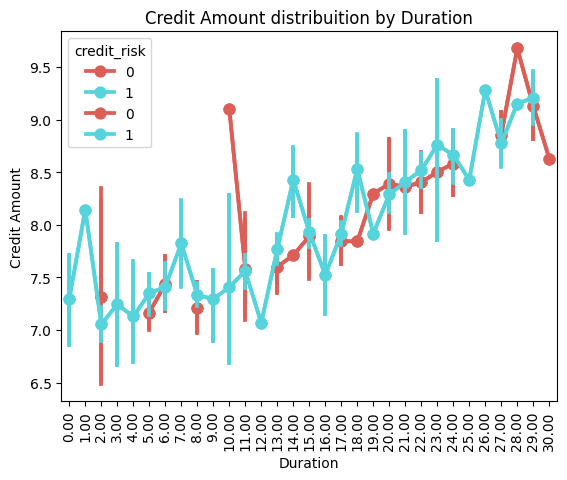

In [91]:
ax = sns.pointplot(x="duration", y="amount", data=train, hue="credit_risk", palette="hls")

# Define a function to format x-axis labels
def format_xaxis_labels(x, pos):
    return '{:.2f}'.format(x)
ax.xaxis.set_major_formatter(FuncFormatter(format_xaxis_labels))
sns.pointplot(x="duration", y ="amount",data=train,
                   hue="credit_risk", palette="hls")
plt.xlabel("Duration")
plt.ylabel("Credit Amount")
plt.title("Credit Amount distribuition by Duration")
plt.xticks(rotation=90)

In [34]:
# check the good and bad loan risk
train['credit_risk'].value_counts()

1    600
0    200
Name: credit_risk, dtype: int64

The dataset is unbalanced

In [36]:
train.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,credit_risk_label,foreign_worker_label
0,1,18,4,2,1049,1,2,4,2,1,...,3,1,1,3,2,1,2,1,Good,no
1,1,9,4,0,2799,1,3,2,3,1,...,3,1,2,3,1,1,2,1,Good,no
2,2,12,2,9,841,2,4,2,2,1,...,3,1,1,2,2,1,2,1,Good,no
3,1,12,4,0,2122,1,3,3,3,1,...,3,1,2,2,1,1,1,1,Good,yes
4,1,10,4,0,2241,1,2,1,3,1,...,3,1,2,2,1,1,1,1,Good,yes


Correlation of Numerical Variables

<ipython-input-104-348d29fb1815>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train[num_variables].corr()


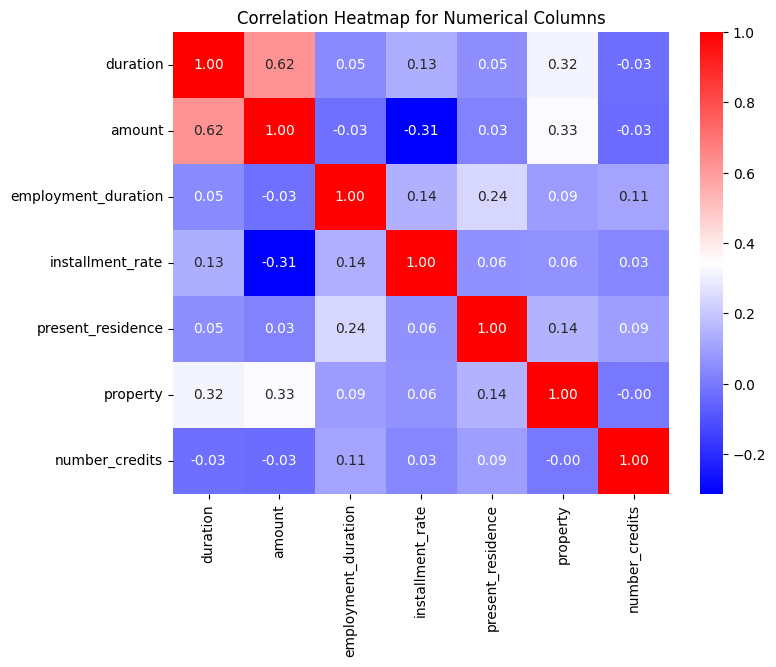

In [104]:
num_variables=['duration','amount','employment_duration','installment_rate','present_residence','property','age','number_credits']
corr_matrix=train[num_variables].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='bwr', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

Correlation between categorical variables

In [27]:
categorical_columns=['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']

from scipy.stats import chi2_contingency

def perform_chi_square_test(df,col1,col2):
  contingency_table = pd.crosstab(df[col1], df[col2])
  chi2, p, dof, _ = chi2_contingency(contingency_table)
  return chi2, p, dof

results = []
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i + 1:]:  # Avoid repeating pairs
        chi2, p, dof = perform_chi_square_test(train, col1, col2)
        results.append({
            'Variable 1': col1,
            'Variable 2': col2,
            'Chi2 Statistic': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        })

# Convert the results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display or further process the results
print(results_df)

                 Variable 1               Variable 2  Chi2 Statistic  \
0                    status           credit_history       52.740014   
1                    status                  purpose       56.120858   
2                    status                  savings       63.991981   
3                    status      personal_status_sex       18.600172   
4                    status            other_debtors       23.727486   
5                    status  other_installment_plans        5.773083   
6                    status                  housing       19.961402   
7            credit_history                  purpose       80.443836   
8            credit_history                  savings       20.582659   
9            credit_history      personal_status_sex       20.465539   
10           credit_history            other_debtors       11.189928   
11           credit_history  other_installment_plans      116.702468   
12           credit_history                  housing       12.52

Modification for test set

In [28]:
test.shape

(200, 21)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       200 non-null    int64
 1   status                   200 non-null    int64
 2   duration                 200 non-null    int64
 3   credit_history           200 non-null    int64
 4   purpose                  200 non-null    int64
 5   amount                   200 non-null    int64
 6   savings                  200 non-null    int64
 7   employment_duration      200 non-null    int64
 8   installment_rate         200 non-null    int64
 9   personal_status_sex      200 non-null    int64
 10  other_debtors            200 non-null    int64
 11  present_residence        200 non-null    int64
 12  property                 200 non-null    int64
 13  age                      200 non-null    int64
 14  other_installment_plans  200 non-null    int64
 15  housin

In [50]:
test.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,4,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,2,1,1
1,14,1,18,2,3,1936,5,4,2,4,...,4,3,23,3,1,2,2,2,1,2
2,18,2,36,4,3,2337,1,5,4,3,...,4,1,36,3,2,1,3,2,1,2
3,20,1,6,4,0,3676,1,3,1,3,...,3,1,37,3,1,3,3,1,1,2
4,22,2,36,2,5,2384,1,2,4,3,...,1,4,33,3,1,1,2,2,1,2


In [30]:
test.drop(['Id'],inplace=True,axis=1)

In [66]:
test.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1
1,1,18,2,3,1936,5,4,2,4,1,4,3,23,3,1,2,2,2,1,2
2,2,36,4,3,2337,1,5,4,3,1,4,1,36,3,2,1,3,2,1,2
3,1,6,4,0,3676,1,3,1,3,1,3,1,37,3,1,3,3,1,1,2
4,2,36,2,5,2384,1,2,4,3,1,1,4,33,3,1,1,2,2,1,2


In [201]:
test_copy=test.copy()
test_copy['amount']=round(np.log(test_copy['amount']),2)
test_copy['duration']=round(np.log(test_copy['duration']),2)
interval=(18,25,35,60,100)
categories= ['Student','Young','Adult','Senior']
test_copy['age']=pd.cut(test_copy.age,interval,labels=categories)
test_copy.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,2.48,4,0,7.68,1,3,4,3,1,4,2,Adult,1,2,2,2,2,1,1
1,1,2.89,2,3,7.57,5,4,2,4,1,4,3,Student,3,1,2,2,2,1,2
2,2,3.58,4,3,7.76,1,5,4,3,1,4,1,Adult,3,2,1,3,2,1,2
3,1,1.79,4,0,8.21,1,3,1,3,1,3,1,Adult,3,1,3,3,1,1,2
4,2,3.58,2,5,7.78,1,2,4,3,1,1,4,Young,3,1,1,2,2,1,2


**Advanced Analysis**

In [6]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold,RepeatedStratifiedKFold

In [31]:
train_copy=train.copy()

In [32]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   800 non-null    int64   
 1   duration                 800 non-null    float64 
 2   credit_history           800 non-null    int64   
 3   purpose                  800 non-null    int64   
 4   amount                   800 non-null    float64 
 5   savings                  800 non-null    int64   
 6   employment_duration      800 non-null    int64   
 7   installment_rate         800 non-null    int64   
 8   personal_status_sex      800 non-null    int64   
 9   other_debtors            800 non-null    int64   
 10  present_residence        800 non-null    int64   
 11  property                 800 non-null    int64   
 12  age                      800 non-null    category
 13  other_installment_plans  800 non-null    int64   
 14  housing   

In [35]:

train_copy['amount']=round(np.log(train_copy['amount']),2)
train_copy['duration']=round(np.log(train_copy['duration']),2)
train_copy.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
795,1,1.06,4,0,2.11,1,5,1,2,1,...,1,Young,1,1,3,3,2,2,2,0
796,1,0.91,0,3,2.17,1,3,4,3,1,...,2,Young,3,1,2,3,2,2,2,0
797,4,1.11,4,0,2.25,5,5,4,3,1,...,4,Young,3,3,1,4,2,2,2,0
798,2,0.91,2,3,2.17,5,1,2,3,1,...,4,Adult,3,2,1,4,2,2,2,0
799,1,1.22,2,2,2.17,5,5,4,3,1,...,2,Young,3,2,1,3,2,1,2,0


In [203]:
age_mapping = {'Student': 0, 'Young': 1, 'Adult': 2, 'Senior': 3}

# Replace categorical values with numerical values
train_copy['age'] = train_copy['age'].replace(age_mapping)
train_copy['age'] = train_copy['age'].astype(int)

In [204]:
x_full=train_copy.drop('credit_risk',axis=1)
y_full=train_copy['credit_risk']

In [137]:
x_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   800 non-null    int64  
 1   duration                 800 non-null    float64
 2   credit_history           800 non-null    int64  
 3   purpose                  800 non-null    int64  
 4   amount                   800 non-null    float64
 5   savings                  800 non-null    int64  
 6   employment_duration      800 non-null    int64  
 7   installment_rate         800 non-null    int64  
 8   personal_status_sex      800 non-null    int64  
 9   other_debtors            800 non-null    int64  
 10  present_residence        800 non-null    int64  
 11  property                 800 non-null    int64  
 12  age                      800 non-null    int64  
 13  other_installment_plans  800 non-null    int64  
 14  housing                  8

In [138]:
y_full.info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: credit_risk
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB


In [205]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

In [140]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 264 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   640 non-null    int64  
 1   duration                 640 non-null    float64
 2   credit_history           640 non-null    int64  
 3   purpose                  640 non-null    int64  
 4   amount                   640 non-null    float64
 5   savings                  640 non-null    int64  
 6   employment_duration      640 non-null    int64  
 7   installment_rate         640 non-null    int64  
 8   personal_status_sex      640 non-null    int64  
 9   other_debtors            640 non-null    int64  
 10  present_residence        640 non-null    int64  
 11  property                 640 non-null    int64  
 12  age                      640 non-null    int64  
 13  other_installment_plans  640 non-null    int64  
 14  housing                 

In [141]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 640 entries, 264 to 102
Series name: credit_risk
Non-Null Count  Dtype
--------------  -----
640 non-null    int64
dtypes: int64(1)
memory usage: 10.0 KB


In [142]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 696 to 670
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   160 non-null    int64  
 1   duration                 160 non-null    float64
 2   credit_history           160 non-null    int64  
 3   purpose                  160 non-null    int64  
 4   amount                   160 non-null    float64
 5   savings                  160 non-null    int64  
 6   employment_duration      160 non-null    int64  
 7   installment_rate         160 non-null    int64  
 8   personal_status_sex      160 non-null    int64  
 9   other_debtors            160 non-null    int64  
 10  present_residence        160 non-null    int64  
 11  property                 160 non-null    int64  
 12  age                      160 non-null    int64  
 13  other_installment_plans  160 non-null    int64  
 14  housing                 

In [172]:
import warnings
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd

def cross_validate(X, y):
    warnings.filterwarnings(action='ignore', message='')

    # Identify numerical and categorical columns
    numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = X.select_dtypes(include=['object', 'category']).columns

    # Define preprocessing steps
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])


    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_columns)
        ], remainder='passthrough')  # Include any remaining columns

    models = [
        ('RF', RandomForestClassifier(random_state=42)),
        ('GB', GradientBoostingClassifier(random_state=42)),
        ('SVC', SVC(random_state=42)),
        ('SGD', SGDClassifier(random_state=42)),
        ('LogReg', LogisticRegression(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(random_state=42)),
        ('Bag', BaggingClassifier(random_state=42)),
        ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
        ('lightgbm', LGBMClassifier(random_state=42)),
        ('Dtree', DecisionTreeClassifier(random_state=42))
    ]

    results = []
    names = []

    kfold = RepeatedStratifiedKFold(n_splits=10, random_state=42, n_repeats=3)

    for name, model in models:
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])
        cv_results = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f'Model: {name}, Mean Accuracy: {cv_results.mean():.4f}, Std Dev: {cv_results.std():.4f}')

    # Optionally, return a DataFrame with the results for further analysis
    return pd.DataFrame({
        'Model': names,
        'Mean Accuracy': [result.mean() for result in results],
        'Std Dev': [result.std() for result in results]
    })

# Example usage (assuming X_train and y_train are defined in your workspace)
# results_df = cross_validate(X_train, y_train)
# print(results_df)


In [210]:
def cross_validate(X = x_train,y = y_train):

    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('lightgbm',LGBMClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))


    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [211]:
results_df = cross_validate(x_train, y_train)

# Print the results DataFrame
print(results_df)


Model:RF,Mean: 0.7791666666666667,Std Dev: 0.03510895738823482
Model:GB,Mean: 0.7807291666666667,Std Dev: 0.05062810775783437
Model:SVC,Mean: 0.775,Std Dev: 0.031919903012592836
Model:SGD,Mean: 0.7125,Std Dev: 0.11379463410020701
Model:LogReg,Mean: 0.7682291666666666,Std Dev: 0.045479815616075475
Model:AdaBoost,Mean: 0.76875,Std Dev: 0.04659639426321884
Model:Bag,Mean: 0.7453125,Std Dev: 0.05707582447572118
Model:xgboost,Mean: 0.7791666666666667,Std Dev: 0.04665457432616394
[LightGBM] [Info] Number of positive: 436, number of negative: 140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756944 -> initscore=1.136000
[LightGBM] [Info] Start t

In [174]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 264 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   640 non-null    int64  
 1   duration                 640 non-null    float64
 2   credit_history           640 non-null    int64  
 3   purpose                  640 non-null    int64  
 4   amount                   640 non-null    float64
 5   savings                  640 non-null    int64  
 6   employment_duration      640 non-null    int64  
 7   installment_rate         640 non-null    int64  
 8   personal_status_sex      640 non-null    int64  
 9   other_debtors            640 non-null    int64  
 10  present_residence        640 non-null    int64  
 11  property                 640 non-null    int64  
 12  age                      640 non-null    int64  
 13  other_installment_plans  640 non-null    int64  
 14  housing                 

Balancing the data by Oversampling using ADASYN Library

In [175]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [176]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 264 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   640 non-null    int64  
 1   duration                 640 non-null    float64
 2   credit_history           640 non-null    int64  
 3   purpose                  640 non-null    int64  
 4   amount                   640 non-null    float64
 5   savings                  640 non-null    int64  
 6   employment_duration      640 non-null    int64  
 7   installment_rate         640 non-null    int64  
 8   personal_status_sex      640 non-null    int64  
 9   other_debtors            640 non-null    int64  
 10  present_residence        640 non-null    int64  
 11  property                 640 non-null    int64  
 12  age                      640 non-null    int64  
 13  other_installment_plans  640 non-null    int64  
 14  housing                 

In [177]:
x_train.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [178]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)
Counter(y_res)

Counter({1: 485, 0: 457})

In [179]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [212]:
cross_validate(X_res,y_res)

Model:RF,Mean: 0.8485442329227323,Std Dev: 0.03271066412950103
Model:GB,Mean: 0.8219559537140723,Std Dev: 0.03780229328385612
Model:SVC,Mean: 0.7887122060470324,Std Dev: 0.03518889022379276
Model:SGD,Mean: 0.699585666293393,Std Dev: 0.07773092065174295
Model:LogReg,Mean: 0.7618402388951101,Std Dev: 0.04026913362700767
Model:AdaBoost,Mean: 0.7695819335572975,Std Dev: 0.035701678039341524
Model:Bag,Mean: 0.804322508398656,Std Dev: 0.04078179395196054
Model:xgboost,Mean: 0.841780515117581,Std Dev: 0.03731572065609472
[LightGBM] [Info] Number of positive: 436, number of negative: 411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514758 -> ini

Let's search for the best parameters in our best model Random Forest

In [181]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),

    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abe0e4f3400>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abe0e572a10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abe0e571b70>},
                   random_state=42, scoring='accuracy')

In [182]:
best_params_rf=rnd_search.best_params_
print('Best parameters of Random Forest model:',best_params_rf)

Best parameters of Random Forest model: {'max_depth': 8, 'max_features': 8, 'n_estimators': 131}


Let's search for the best parameters in our next best model-XGboost

In [183]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]
xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid=[{'booster': ['gbtree', 'dart'],
                          'learning_rate': [0.3, 0.5, 0.01, 0.1],
                          'max_depth': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='accuracy')

In [184]:
best_params_xgb=grid_search.best_params_
print('Best Parameters for XGBoost model:',best_params_xgb)

Best Parameters for XGBoost model: {'booster': 'gbtree', 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 30}


Best parameter search for Gradient Boost

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting Classifier with default parameters
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(gb_clf, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fit the data to perform the search
grid_search_gb.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [186]:
best_params_gb=grid_search_gb.best_params_
print('Best Parameters for Gradient Boost model:',best_params_gb)

Best Parameters for Gradient Boost model: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}


New accuracy with best parameters-Random Forest model

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Best parameters obtained from your search
best_params_rf = {'n_estimators': 131, 'max_depth': 8, 'max_features': 8}

# Initialize the Random Forest Classifier with the best parameters
rf_clf_best = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the classifier on the training data
rf_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train_rf = rf_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train_rf = accuracy_score(y_res, y_pred_train_rf)
print("Accuracy on training data (Random Forest):", accuracy_train_rf)


Accuracy on training data (Random Forest): 0.9469214437367304


New accuracy with best parameters -XGBoost

In [188]:
# Initialize the XGBoost Classifier with the best parameters
xgb_clf_best = XGBClassifier(**best_params_xgb, random_state=42)

# Fit the classifier on the training data
xgb_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train_xgb = xgb_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train_xgb = accuracy_score(y_res, y_pred_train_xgb)
print("Accuracy on training data (XGBoost):", accuracy_train_xgb)


Accuracy on training data (XGBoost): 0.9978768577494692


New Accuracy with best parameters-Gradient Boost

In [189]:
# Initialize the Gradient Boosting Classifier with the best parameters
gb_clf_best = GradientBoostingClassifier(**best_params_gb, random_state=42)

# Fit the classifier on the training data
gb_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train = gb_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(y_res, y_pred_train)
print("Accuracy on training data:", accuracy_train)


Accuracy on training data: 1.0


In [190]:
rf_clf.fit(X_res,y_res)
RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)
gb_clf.fit(X_res,y_res)
GradientBoostingClassifier(random_state=42)
xgb_clf = XGBClassifier(n_estimators=30, max_depth=8, learning_rate=0.3, booster='gbtree', random_state=42)
xgb_clf.fit(X_res, y_res)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [191]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 264 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   640 non-null    int64  
 1   duration                 640 non-null    float64
 2   credit_history           640 non-null    int64  
 3   purpose                  640 non-null    int64  
 4   amount                   640 non-null    float64
 5   savings                  640 non-null    int64  
 6   employment_duration      640 non-null    int64  
 7   installment_rate         640 non-null    int64  
 8   personal_status_sex      640 non-null    int64  
 9   other_debtors            640 non-null    int64  
 10  present_residence        640 non-null    int64  
 11  property                 640 non-null    int64  
 12  age                      640 non-null    int64  
 13  other_installment_plans  640 non-null    int64  
 14  housing                 

In [192]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 696 to 670
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   160 non-null    int64  
 1   duration                 160 non-null    float64
 2   credit_history           160 non-null    int64  
 3   purpose                  160 non-null    int64  
 4   amount                   160 non-null    float64
 5   savings                  160 non-null    int64  
 6   employment_duration      160 non-null    int64  
 7   installment_rate         160 non-null    int64  
 8   personal_status_sex      160 non-null    int64  
 9   other_debtors            160 non-null    int64  
 10  present_residence        160 non-null    int64  
 11  property                 160 non-null    int64  
 12  age                      160 non-null    int64  
 13  other_installment_plans  160 non-null    int64  
 14  housing                 

In [193]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 696 to 670
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   160 non-null    int64  
 1   duration                 160 non-null    float64
 2   credit_history           160 non-null    int64  
 3   purpose                  160 non-null    int64  
 4   amount                   160 non-null    float64
 5   savings                  160 non-null    int64  
 6   employment_duration      160 non-null    int64  
 7   installment_rate         160 non-null    int64  
 8   personal_status_sex      160 non-null    int64  
 9   other_debtors            160 non-null    int64  
 10  present_residence        160 non-null    int64  
 11  property                 160 non-null    int64  
 12  age                      160 non-null    int64  
 13  other_installment_plans  160 non-null    int64  
 14  housing                 

In [165]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 640 entries, 264 to 102
Series name: credit_risk
Non-Null Count  Dtype
--------------  -----
640 non-null    int64
dtypes: int64(1)
memory usage: 10.0 KB


In [166]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 160 entries, 696 to 670
Series name: credit_risk
Non-Null Count  Dtype
--------------  -----
160 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [195]:
print(x_train.columns)

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')


In [196]:
print(x_test.columns)

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')


In [206]:
x_test.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
696,4,0.58,2,2,2.13,1,2,1,2,1,4,2,1,3,2,1,3,2,1,2
667,2,1.00,0,0,2.01,1,2,2,2,1,1,1,1,3,1,2,1,2,1,2
63,4,1.00,2,3,2.03,5,5,4,3,1,2,3,1,3,2,1,3,2,1,2
533,2,0.91,2,3,1.95,1,3,4,2,3,4,1,2,3,2,2,3,2,2,2
66,4,1.00,4,2,1.99,5,5,4,3,1,4,2,3,3,2,1,3,2,1,2


In [213]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
predictions_xgb_test = xgb_clf.predict(x_test)

# Calculate accuracy on the test data
accuracy_xgb_test = accuracy_score(y_test, predictions_xgb_test)

# Print the accuracy score
print('Accuracy on test set (XGBoost): {:.4f}'.format(accuracy_xgb_test))


ValueError: feature_names mismatch: ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker'] ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']
training data did not have the following fields: age

In [207]:
predictions_train_xgb = xgb_clf.predict(x_test)
predictions_train_rf = rf_clf.predict(x_test)
predictions_train_gb = gb_clf.predict(x_test)
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,predictions_train_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_test,predictions_train_rf)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_test,predictions_train_gb)))

ValueError: feature_names mismatch: ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker'] ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']
training data did not have the following fields: age

In [168]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 264 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   640 non-null    int64  
 1   duration                 640 non-null    float64
 2   credit_history           640 non-null    int64  
 3   purpose                  640 non-null    int64  
 4   amount                   640 non-null    float64
 5   savings                  640 non-null    int64  
 6   employment_duration      640 non-null    int64  
 7   installment_rate         640 non-null    int64  
 8   personal_status_sex      640 non-null    int64  
 9   other_debtors            640 non-null    int64  
 10  present_residence        640 non-null    int64  
 11  property                 640 non-null    int64  
 12  age                      640 non-null    int64  
 13  other_installment_plans  640 non-null    int64  
 14  housing                 

In [120]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 640 entries, 264 to 102
Series name: credit_risk
Non-Null Count  Dtype
--------------  -----
640 non-null    int64
dtypes: int64(1)
memory usage: 10.0 KB


In [169]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 696 to 670
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   160 non-null    int64  
 1   duration                 160 non-null    float64
 2   credit_history           160 non-null    int64  
 3   purpose                  160 non-null    int64  
 4   amount                   160 non-null    float64
 5   savings                  160 non-null    int64  
 6   employment_duration      160 non-null    int64  
 7   installment_rate         160 non-null    int64  
 8   personal_status_sex      160 non-null    int64  
 9   other_debtors            160 non-null    int64  
 10  present_residence        160 non-null    int64  
 11  property                 160 non-null    int64  
 12  age                      160 non-null    int64  
 13  other_installment_plans  160 non-null    int64  
 14  housing                 

In [124]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 160 entries, 696 to 670
Series name: credit_risk
Non-Null Count  Dtype
--------------  -----
160 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [214]:
predictions_xgb = xgb_clf.predict(x_test)

# Compute accuracy
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print('Accuracy XGBoost: {:.4f}'.format(accuracy_xgb))

ValueError: feature_names mismatch: ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker'] ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']
training data did not have the following fields: age

In [216]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_xgb))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_rf))
print('SupportVector_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_svc))
print('GradientBoosting_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))
print('Bagging_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))

XGBoost_Confusion Matrix


NameError: name 'predictions_train_xgb' is not defined